# Basic SQL

In this lab, we will explore basic SQL using our Jupyter notebook using Google Colab.

**Objectives**
- Transforming a relational model to database.
- Understanding constraints.
- Creating database models.
- Adding data to your table using INSERT Statements.
- Updating data using UPDATE Statements.
- Deleting data using DELETE Statements.
- Understanding SQL JOINs (INNER, LEFT, RIGHT, OUTER) joins.
- Adding conditions to your query.
- Using SQL Summary contructs with GROUP BY statements.



## Installing SQLite Database Engine

SQLite is a light weight small, fast, open-source, self-contained and fully featured SQL database engine. This light-weight database is the most used in the world since it can be bundled into countless applications in mobile devices.

In this lab, we will use SQLite to implement the relational model from our previous lab on E/R modeling.

**Reference**
- SQLite - https://www.sqlite.org/index.html

In [1]:
# to hide output of this cell
%%capture

!pip install ipython-sql
!pip install databases
!pip install databases[sqlite]

In [2]:
import sqlalchemy
%load_ext sql
%sql sqlite:///projectdb.db

'Connected: @projectdb.db'

### Creating Database Tables for our application

We use the CREATE TABLE statement to create tables. However, since we want to re-run the CREATE TABLE statement as needed, we will preceed each with a DROP TABLE IF EXISTS statement (not to be used for PRODUCTION deployment).

In creating a table, we need to identify the key to the table, and the constraints.

The following constraints supported by SQLite are used in the table definition:
1. **NOT NULL Constraint** - Ensures that the field being created will not accept a NULL value
2. **DEFAULT Constraint** - Provides a default value for a column when none is specified. This is especially helpful with simplifying INSERT statements.
3. **Primary Key Constraint** - Ensures that the value in a column is unique for each record in the table.
4. **Foreign Key Constraint** - Relates a field in the child table to a key field in the parent table.

**Reference**
 - **SQLite Foreign key constraints** - https://www.sqlitetutorial.net/sqlite-foreign-key/


In [3]:
%%sql

DROP TABLE IF EXISTS [Position];
CREATE TABLE [Position] (
  [id] INTEGER PRIMARY KEY,
  [position] nvarchar(250) NOT NULL,
  [active] boolean boolean DEFAULT 1
);

DROP TABLE IF EXISTS [Activity];
CREATE TABLE [Activity] (
  [id] INTEGER PRIMARY KEY,
  [activity] nvarchar(250) NOT NULL,
  [active] boolean boolean DEFAULT 1
);

DROP TABLE IF EXISTS [Address];
CREATE TABLE [Address] (
  [id] INTEGER PRIMARY KEY,
  [street_number] nvarchar(250),
  [street_name] nvarchar(250) NOT NULL,
  [zip_code] nvarchar(20),
  [city] nvarchar(250) NOT NULL,
  [state] nvarchar(200) NOT NULL,
  [country] nvarchar(250)
);


DROP TABLE IF EXISTS [WorkProject];
CREATE TABLE [WorkProject] (
  [id] INTEGER PRIMARY KEY,
  [project_name] nvarchar(250) NOT NULL,
  [address_id] [int],
  [date_created] datetime NOT NULL,
  FOREIGN KEY ([address_id]) REFERENCES [Address] ([id])
      ON DELETE SET NULL
);


DROP TABLE IF EXISTS [Employee];
CREATE TABLE [Employee] (
  [id] INTEGER PRIMARY KEY,
  [surname] nvarchar(250) NOT NULL,
  [firstname] nvarchar(250) NOT NULL,  
  [middlename] varchar(250),
  [date_of_birth] date NOT NULL,
  [active] boolean DEFAULT 1
);


DROP TABLE IF EXISTS [EmployeePosition];
CREATE TABLE [EmployeePosition]  (
  [id] INTEGER PRIMARY KEY,
  [employee_id] int,
  [position_id] int,
  [charge_per_hour] float,
  [start_date] datetime NOT NULL,
  [end_date] datetime, 
  FOREIGN KEY ([employee_id]) REFERENCES [Employee] ([id]) ON DELETE SET NULL,
  FOREIGN KEY ([position_id]) REFERENCES [Position] ([id]) ON DELETE SET NULL
);


DROP TABLE IF EXISTS [EmployeeProjectActivity];
CREATE TABLE [EmployeeProjectActivity] (
  [id] INTEGER PRIMARY KEY,
  [employee_position_id] int,
  [project_id] int,
  [activity_id] int,
  [activity_date] datetime NOT NULL,
  [hours_billed] float4,
  FOREIGN KEY ([project_id]) REFERENCES [WorkProject] ([id]) ON DELETE SET NULL
  FOREIGN KEY ([employee_position_id]) REFERENCES [EmployeePosition] ([id]) ON DELETE SET NULL
);

DROP TABLE IF EXISTS [EmployeeAddress];
CREATE TABLE [EmployeeAddress] (
  [employee_id] int,
  [address_id] int,
  [start_date] datetime NOT NULL,
  [end_date] datetime NULL,
  PRIMARY KEY ([employee_id], [address_id]),
  FOREIGN KEY ([employee_id]) REFERENCES [Employee] ([id]) ON DELETE SET NULL
);



 * sqlite:///projectdb.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [4]:
%%sql

PRAGMA foreign_keys;

 * sqlite:///projectdb.db
Done.


foreign_keys
0


In [5]:
# We can enable foreign key contraints

%%sql

PRAGMA foreign_keys = ON;

 * sqlite:///projectdb.db
Done.


[]

### Showing table definitions using the SQLite pragma command.

In [6]:
print('Position Table')
%sql pragma table_info('Position');


Position Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,position,nvarchar(250),1,None,0
2,active,boolean boolean,0,1,0


In [7]:
print('Activity Table')
%sql pragma table_info('Activity');

Activity Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,activity,nvarchar(250),1,None,0
2,active,boolean boolean,0,1,0


In [8]:
print('WorkProject Table')
%sql pragma table_info('WorkProject');


WorkProject Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,project_name,nvarchar(250),1,None,0
2,address_id,int,0,None,0
3,date_created,datetime,1,None,0


In [9]:
print('EmployeePosition Table')
%sql pragma table_info('EmployeePosition');

EmployeePosition Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,employee_id,int,0,None,0
2,position_id,int,0,None,0
3,charge_per_hour,float,0,None,0
4,start_date,datetime,1,None,0
5,end_date,datetime,0,None,0


In [10]:
print('EmployeeProjectActivity Table')
%sql pragma table_info('EmployeeProjectActivity');


EmployeeProjectActivity Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,0,None,1
1,employee_position_id,int,0,None,0
2,project_id,int,0,None,0
3,activity_id,int,0,None,0
4,activity_date,datetime,1,None,0
5,hours_billed,float4,0,None,0


In [11]:
print('EmployeeAddress Table')
%sql pragma table_info('EmployeeAddress');

EmployeeAddress Table
 * sqlite:///projectdb.db
Done.


cid,name,type,notnull,dflt_value,pk
0,employee_id,int,0,None,1
1,address_id,int,0,None,2
2,start_date,datetime,1,None,0
3,end_date,datetime,0,None,0


### Initializing our tables with data.

We start with populating the reference tables before populating the child tables.


In [12]:
%%sql

INSERT INTO Position([position]) VALUES ('Elec. Engineer');
INSERT INTO Position([position]) VALUES ('Database Designer');
INSERT INTO Position([position]) VALUES ('Programmer');
INSERT INTO Position([position]) VALUES ('Systems Analyst');
INSERT INTO Position([position]) VALUES ('Applications Designer');
INSERT INTO Position([position]) VALUES ('General Support');
INSERT INTO Position([position]) VALUES ('DSS Analyst');
INSERT INTO Position([position]) VALUES ('Clerical Support');

 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [16]:
%%sql

SELECT *
FROM Position;

 * sqlite:///projectdb.db
Done.


id,position,active
1,Elec. Engineer,1
2,Database Designer,1
3,Programmer,1
4,Systems Analyst,1
5,Applications Designer,1
6,General Support,1
7,DSS Analyst,1
8,Clerical Support,1


In [13]:
%%sql

INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('2A', 'Lincoln Ave.', '96522', 'Mankato', 'Mississippi', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('Theodore Lowe', 'Ap #867-859 Sit Rd.', '39531', 'Azusa', 'New York', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('313', 'Pellentesque Ave', '43526', 'Mankato', 'Hawaii', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('987-4223', 'LUrna St.', '96522', 'Savannah ', 'Illinois', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('Ap #784-1887', 'Lobortis Ave', '31522', 'Cudahy', 'Ohio', 'USA');
INSERT INTO Address([street_number],[street_name],[zip_code],[city],[state],[country]) VALUES ('3714', 'Nascetur St', '10626', 'Hawthorne', 'Louisiana', 'USA');

 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [14]:
%%sql

INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Evergreen', 2, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Amber Wave', 3, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Rolling Table', 2, date());
INSERT INTO WorkProject([project_name],[address_id],[date_created]) VALUES ('Starflight', 5, date());

 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [15]:
%%sql

/* Employee data */
INSERT INTO Employee([surname], [middlename], [firstname], [date_of_birth]) VALUES ('Arbough', 'Earl', 'June', '1998-03-10');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('News', 'Gerald', 'John', '1965-03-10');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Johnson', 'Karen', 'Alice', '1980-04-03');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Smithfield', '', 'William', '1968-09-17');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Senior', 'Harold', 'David', '1975-06-14');

INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Annelise', '', 'Jones', '1970-04-20');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Frommer', 'John', 'James', '1997-06-12');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Ramoras', 'Katie', 'Anne', '1985-01-23');
INSERT INTO Employee([surname], [middlename], [firstname],[date_of_birth]) VALUES ('Smithson', 'Mary', 'David', '1960-05-04');

 * sqlite:///projectdb.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [17]:
%%sql

INSERT INTO Activity([activity]) VALUES ('Weekly Project Meeting');
INSERT INTO Activity([activity]) VALUES ('Requirements Gathering');
INSERT INTO Activity([activity]) VALUES ('Inventory Analysis');
INSERT INTO Activity([activity]) VALUES ('Inventory Validation');
INSERT INTO Activity([activity]) VALUES ('Weekly Project Meeting');
INSERT INTO Activity([activity]) VALUES ('Instrument Repairs');
INSERT INTO Activity([activity]) VALUES ('Design Specifications');
INSERT INTO Activity([activity]) VALUES ('Troubleshooting');
INSERT INTO Activity([activity]) VALUES ('DB Modeling');
INSERT INTO Activity([activity]) VALUES ('Reporting');
INSERT INTO Activity([activity]) VALUES ('Query Generation');
INSERT INTO Activity([activity]) VALUES ('Software Maintenance');
INSERT INTO Activity([activity]) VALUES ('Building mockups');


 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [18]:
%%sql

INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (1, 2,  85.5, '2015-01-01');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (2, 2,  105.5, '2019-03-20');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (3, 3,  37.5, '2017-04-04');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (4, 4,  96.5, '2018-10-13');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (5, 5,  26.5, '2019-09-05');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (6, 2,  85.5, '2012-02-03');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (7, 3,  50.5, '2014-05-01');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (8, 4,  65.5, '2016-03-04');
INSERT INTO EmployeePosition([employee_id], [position_id],[charge_per_hour], [start_date]) VALUES (9, 2,  85.5, '2017-04-03');

 * sqlite:///projectdb.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [19]:
%%sql

SELECT *
FROM EmployeePosition

 * sqlite:///projectdb.db
Done.


id,employee_id,position_id,charge_per_hour,start_date,end_date
1,1,2,85.5,2015-01-01,None
2,2,2,105.5,2019-03-20,None
3,3,3,37.5,2017-04-04,None
4,4,4,96.5,2018-10-13,None
5,5,5,26.5,2019-09-05,None
6,6,2,85.5,2012-02-03,None
7,7,3,50.5,2014-05-01,None
8,8,4,65.5,2016-03-04,None
9,9,2,85.5,2017-04-03,None


In [20]:
%%sql

/* Employee hourly billed activities */
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 1, 1, '2020-11-02', 21.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 2, 2, '2020-11-03', 12.50);
INSERT INTO EmployeeProjectActivity([project_id], [employee_position_id], [activity_id], [activity_date], [hours_billed]) VALUES (1, 3, 3, '2020-11-04', 44.75);

 * sqlite:///projectdb.db
Done.
1 rows affected.
1 rows affected.


[]

In [21]:
%%sql

/* Employee addresses */
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 1, '2017-01-02');
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 3, '2018-04-03');
INSERT INTO EmployeeAddress([employee_id], [address_id], [start_date]) VALUES (1, 5, '2019-09-04');

 * sqlite:///projectdb.db
Done.
1 rows affected.
1 rows affected.


[]

## UPDATing Table record(s)

In [22]:
%%sql

UPDATE EmployeeAddress
  SET [end_date] = date()
WHERE [employee_id] = 1 AND [address_id] = 5
;

SELECT * FROM EmployeeAddress;

 * sqlite:///projectdb.db
1 rows affected.
Done.


employee_id,address_id,start_date,end_date
1,1,2017-01-02,None
1,3,2018-04-03,None
1,5,2019-09-04,2020-07-27


### SELECTing Table data

In [23]:
%%sql

SELECT *
FROM Address;


 * sqlite:///projectdb.db
Done.


id,street_number,street_name,zip_code,city,state,country
1,2A,Lincoln Ave.,96522,Mankato,Mississippi,USA
2,Theodore Lowe,Ap #867-859 Sit Rd.,39531,Azusa,New York,USA
3,313,Pellentesque Ave,43526,Mankato,Hawaii,USA
4,987-4223,LUrna St.,96522,Savannah,Illinois,USA
5,Ap #784-1887,Lobortis Ave,31522,Cudahy,Ohio,USA
6,3714,Nascetur St,10626,Hawthorne,Louisiana,USA


In [24]:
%%sql

SELECT DISTINCT street_name, zip_code, city
FROM Address;

 * sqlite:///projectdb.db
Done.


street_name,zip_code,city
Lincoln Ave.,96522,Mankato
Ap #867-859 Sit Rd.,39531,Azusa
Pellentesque Ave,43526,Mankato
LUrna St.,96522,Savannah
Lobortis Ave,31522,Cudahy
Nascetur St,10626,Hawthorne


In [25]:
# https://www.sqlite.org/lang_datefunc.html
%%sql

SELECT emp.*
  , strftime('%Y', date_of_birth) AS year_of_birth
  , strftime('%Y',date()) - strftime('%Y', date_of_birth) As age
FROM Employee emp
;

 * sqlite:///projectdb.db
Done.


id,surname,firstname,middlename,date_of_birth,active,year_of_birth,age
1,Arbough,June,Earl,1998-03-10,1,1998,22
2,News,John,Gerald,1965-03-10,1,1965,55
3,Johnson,Alice,Karen,1980-04-03,1,1980,40
4,Smithfield,William,,1968-09-17,1,1968,52
5,Senior,David,Harold,1975-06-14,1,1975,45
6,Annelise,Jones,,1970-04-20,1,1970,50
7,Frommer,James,John,1997-06-12,1,1997,23
8,Ramoras,Anne,Katie,1985-01-23,1,1985,35
9,Smithson,David,Mary,1960-05-04,1,1960,60


In [26]:
# https://www.sqlite.org/lang_corefunc.html#substr

%%sql

SELECT emp.id
  , emp.surname
  , emp.firstname
  , UPPER(surname) || ' ' || firstname || ' ' || SUBSTR(middlename, 1, 1) as employee_name
  , strftime('%Y', date_of_birth) AS year_of_birth
  , strftime('%Y',date()) - strftime('%Y', date_of_birth) As age
FROM Employee emp
WHERE (strftime('%Y',date()) - strftime('%Y', date_of_birth)) > 45;

 * sqlite:///projectdb.db
Done.


id,surname,firstname,employee_name,year_of_birth,age
2,News,John,NEWS John G,1965,55
4,Smithfield,William,SMITHFIELD William,1968,52
6,Annelise,Jones,ANNELISE Jones,1970,50
9,Smithson,David,SMITHSON David M,1960,60


## SQL JOINs

SQL JOIN gives us a mechanism for stitching together together data from multiple normalized tables for various reporting needs.

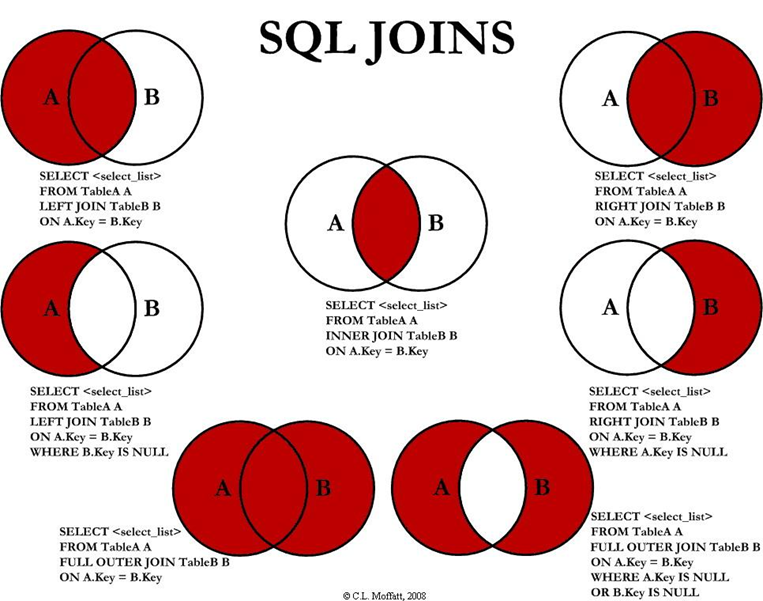

In [27]:
# Using a LEFT JOIN
%%sql


SELECT e.id AS position_id
  , e.employee_id
  , UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
  , strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
  , p.position   As job_role
FROM EmployeePosition e
LEFT JOIN Employee emp ON e.employee_id = emp.id
LEFT JOIN Position p ON e.position_id = p.id

 * sqlite:///projectdb.db
Done.


position_id,employee_id,employee_name,age,job_role
1,1,ARBOUGH June E,22,Database Designer
2,2,NEWS John G,55,Database Designer
3,3,JOHNSON Alice K,40,Programmer
4,4,SMITHFIELD William,52,Systems Analyst
5,5,SENIOR David H,45,Applications Designer
6,6,ANNELISE Jones,50,Database Designer
7,7,FROMMER James J,23,Programmer
8,8,RAMORAS Anne K,35,Systems Analyst
9,9,SMITHSON David M,60,Database Designer


In [28]:
# Using a INNER JOIN
%%sql

SELECT e.id
  , e.employee_id
  , UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
  , strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
  , p.position   As Job
  , e.charge_per_hour
FROM EmployeePosition e
INNER JOIN Employee emp ON e.employee_id = emp.id
INNER JOIN Position p ON e.position_id = p.id

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
3,3,JOHNSON Alice K,40,Programmer,37.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5
5,5,SENIOR David H,45,Applications Designer,26.5
6,6,ANNELISE Jones,50,Database Designer,85.5
7,7,FROMMER James J,23,Programmer,50.5
8,8,RAMORAS Anne K,35,Systems Analyst,65.5
9,9,SMITHSON David M,60,Database Designer,85.5


In [29]:
# Updating a record with the wrong foreign key - forcing the foreign key constraint to kick in and deny the transaction.
%%sql

UPDATE EmployeePosition
SET position_id = 100
WHERE id = 9;

 * sqlite:///projectdb.db


IntegrityError: ignored

In [30]:
%%sql

UPDATE EmployeePosition
SET position_id = NULL
WHERE id = 9;

 * sqlite:///projectdb.db
1 rows affected.


[]

In [31]:
%%sql

SELECT e.id
  , e.employee_id
  , UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
  , strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
  , p.position   As Job  
  , e.charge_per_hour
FROM EmployeePosition e
INNER JOIN Employee emp ON e.employee_id = emp.id
INNER JOIN Position p ON e.position_id = p.id

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
1,1,ARBOUGH June E,22,Database Designer,85.5
2,2,NEWS John G,55,Database Designer,105.5
3,3,JOHNSON Alice K,40,Programmer,37.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5
5,5,SENIOR David H,45,Applications Designer,26.5
6,6,ANNELISE Jones,50,Database Designer,85.5
7,7,FROMMER James J,23,Programmer,50.5
8,8,RAMORAS Anne K,35,Systems Analyst,65.5


In [32]:
%%sql

UPDATE EmployeePosition
SET position_id = 2
WHERE id = 9;

SELECT 
  p.position   As Job
  , AVG(e.charge_per_hour) As Average
FROM EmployeePosition e
LEFT JOIN Position p ON e.position_id = p.id
GROUP BY p.position
ORDER BY Average DESC


 * sqlite:///projectdb.db
1 rows affected.
Done.


Job,Average
Database Designer,90.5
Systems Analyst,81.0
Programmer,44.0
Applications Designer,26.5


In [33]:
%%sql

SELECT 
  p.position   As Job
  , COUNT(DISTINCT emp.id) As EmployeeCount
  , AVG(e.charge_per_hour) As AveragePay
  , MIN(e.charge_per_hour) As MinPay
  , MAX(e.charge_per_hour) As MaxPay
FROM EmployeePosition e
LEFT JOIN Employee emp ON e.employee_id = emp.id
LEFT JOIN Position p ON e.position_id = p.id
GROUP BY p.position
ORDER BY AveragePay DESC

 * sqlite:///projectdb.db
Done.


Job,EmployeeCount,AveragePay,MinPay,MaxPay
Database Designer,4,90.5,85.5,105.5
Systems Analyst,2,81.0,65.5,96.5
Programmer,2,44.0,37.5,50.5
Applications Designer,1,26.5,26.5,26.5


In [34]:
%%sql

SELECT 
  p.position   As Job
  , COUNT(DISTINCT emp.id) As EmployeeCount
  , AVG(e.charge_per_hour) As AveragePay
  , MIN(e.charge_per_hour) As MinPay
  , MAX(e.charge_per_hour) As MaxPay
FROM EmployeePosition e
LEFT JOIN Employee emp ON e.employee_id = emp.id
LEFT JOIN Position p ON e.position_id = p.id
GROUP BY p.position
HAVING AVG(e.charge_per_hour) < 50.0
ORDER BY AveragePay DESC

 * sqlite:///projectdb.db
Done.


Job,EmployeeCount,AveragePay,MinPay,MaxPay
Programmer,2,44.0,37.5,50.5
Applications Designer,1,26.5,26.5,26.5


### Recreating the denormalized dataset for reporting



In [36]:
%%sql

SELECT pa.id
, p.project_name
, UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
, pos.position
, strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
, a.activity
, pa.activity_date
, ep.charge_per_hour
, pa.hours_billed
, ad.street_number || ' ' || ad.street_name || ' ' || ad.city || ' ' || ad.zip_code || ', ' || ad.state As address_summary
, ep.charge_per_hour * pa.hours_billed AS total_charge
FROM EmployeeProjectActivity pa
LEFT JOIN EmployeePosition ep ON ep.id = pa.employee_position_id
INNER JOIN Employee emp ON ep.employee_id = emp.id
LEFT JOIN WorkProject p ON p.id = pa.project_id 
LEFT JOIN Activity a ON a.id = pa.activity_id
LEFT JOIN Position pos ON ep.position_id = pos.id
LEFT JOIN Address ad ON p.address_id = ad.id
;

 * sqlite:///projectdb.db
Done.


id,project_name,employee_name,position,age,activity,activity_date,charge_per_hour,hours_billed,address_summary,total_charge
1,Evergreen,ARBOUGH June E,Database Designer,22,Weekly Project Meeting,2020-11-02,85.5,21.5,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1838.25
2,Evergreen,NEWS John G,Database Designer,55,Requirements Gathering,2020-11-03,105.5,12.5,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1318.75
3,Evergreen,JOHNSON Alice K,Programmer,40,Inventory Analysis,2020-11-04,37.5,44.75,"Theodore Lowe Ap #867-859 Sit Rd. Azusa 39531, New York",1678.125


### DELETing data from our tables.

In [37]:
%%sql

SELECT *
FROM Position
;

 * sqlite:///projectdb.db
Done.


id,position,active
1,Elec. Engineer,1
2,Database Designer,1
3,Programmer,1
4,Systems Analyst,1
5,Applications Designer,1
6,General Support,1
7,DSS Analyst,1
8,Clerical Support,1


In [39]:
%%sql
DELETE FROM Position
WHERE id = 2;


 * sqlite:///projectdb.db
1 rows affected.


[]

In [40]:
%%sql

SELECT *
FROM Position
;

 * sqlite:///projectdb.db
Done.


id,position,active
1,Elec. Engineer,1
3,Programmer,1
4,Systems Analyst,1
5,Applications Designer,1
6,General Support,1
7,DSS Analyst,1
8,Clerical Support,1


In [41]:
%%sql

SELECT *
FROM EmployeePosition;

 * sqlite:///projectdb.db
Done.


id,employee_id,position_id,charge_per_hour,start_date,end_date
1,1,None,85.5,2015-01-01,None
2,2,None,105.5,2019-03-20,None
3,3,3,37.5,2017-04-04,None
4,4,4,96.5,2018-10-13,None
5,5,5,26.5,2019-09-05,None
6,6,None,85.5,2012-02-03,None
7,7,3,50.5,2014-05-01,None
8,8,4,65.5,2016-03-04,None
9,9,None,85.5,2017-04-03,None


In [42]:
%%sql

SELECT e.id
  , e.employee_id
  , UPPER(emp.surname) || ' ' || emp.firstname || ' ' || SUBSTR(emp.middlename, 1, 1) as employee_name
  , strftime('%Y',date()) - strftime('%Y', emp.date_of_birth) As age
  , p.position   As Job  
  , e.charge_per_hour
FROM EmployeePosition e
INNER JOIN Employee emp ON e.employee_id = emp.id
INNER JOIN Position p ON e.position_id = p.id

 * sqlite:///projectdb.db
Done.


id,employee_id,employee_name,age,Job,charge_per_hour
3,3,JOHNSON Alice K,40,Programmer,37.5
4,4,SMITHFIELD William,52,Systems Analyst,96.5
5,5,SENIOR David H,45,Applications Designer,26.5
7,7,FROMMER James J,23,Programmer,50.5
8,8,RAMORAS Anne K,35,Systems Analyst,65.5
